# Emotion Analysis of EEG Data

In [1]:
import numpy as np
import pandas as pd

from eeg import *

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set_theme(style="ticks")

## Load Data

In [4]:
data, emotion, sampling_rate = load_data("eeg_emotion.hdf5")

## Process Data

### Emotion 定类

In [96]:
# 四象限分类
labels = np.zeros(emotion.shape[0], dtype=int)

labels[(emotion[:, 0] <  5) & (emotion[:, 1] <  5)] = 0
labels[(emotion[:, 0] >= 5) & (emotion[:, 1] <  5)] = 1
labels[(emotion[:, 0] <  5) & (emotion[:, 1] >= 5)] = 2
labels[(emotion[:, 0] >= 5) & (emotion[:, 1] >= 5)] = 3

<AxesSubplot:>

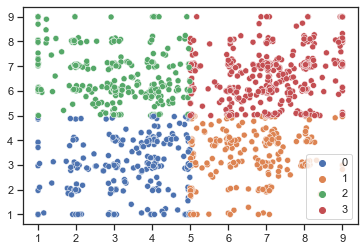

In [97]:
sns.scatterplot(x=emotion[:, 0], y=emotion[:, 1], hue=labels, palette="deep")

In [98]:
pd.DataFrame(
    labels,
    columns=['labels']
).to_excel("labels_4.xlsx")

In [99]:
# 上下分类
labels = np.zeros(emotion.shape[0], dtype=int)

labels[emotion[:, 0] <  5] = 0
labels[emotion[:, 0] >= 5] = 1

<AxesSubplot:>

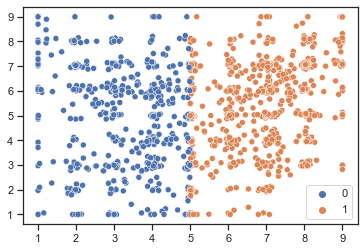

In [100]:
sns.scatterplot(x=emotion[:, 0], y=emotion[:, 1], hue=labels)

In [101]:
pd.DataFrame(
    labels,
    columns=['labels']
).to_excel("labels_2_by0.xlsx")

In [102]:
# 左右分类
labels = np.zeros(emotion.shape[0], dtype=int)

labels[emotion[:, 1] <  5] = 0
labels[emotion[:, 1] >= 5] = 1

<AxesSubplot:>

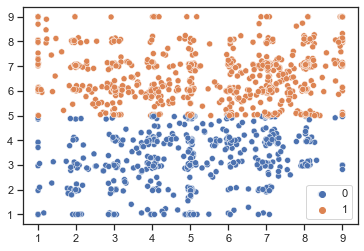

In [103]:
sns.scatterplot(x=emotion[:, 0], y=emotion[:, 1], hue=labels)

In [104]:
pd.DataFrame(
    labels,
    columns=['labels']
).to_excel("labels_2_by1.xlsx")

In [105]:
# 斜向分类
labels = np.zeros(emotion.shape[0], dtype=int)

labels[emotion[:, 0] <= emotion[:, 1]] = 0
labels[emotion[:, 0] >  emotion[:, 1]] = 1

<AxesSubplot:>

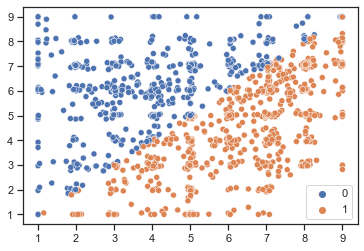

In [106]:
sns.scatterplot(x=emotion[:, 0], y=emotion[:, 1], hue=labels)

In [109]:
pd.DataFrame(
    labels,
    columns=['labels']
).to_excel("labels_2_by0&1.xlsx")

### PSD特征

计算频带功率谱密度PSD特征

- signal:输入信号
- N:采样点数

输出: PSD \[theta, alpha, beta, gamma\]

计算 4-45Hz 四个频带 theta, alpha, beta, gamma 的 PSD

Reference: [brain-waves](https://www.sciencedirect.com/topics/agricultural-and-biological-sciences/brain-waves)

- **直接法**: $P(k)=\frac{1}{N}|x(k)|^2$
- **Welch方法**: 常用方法

#### Periodogram Method

In [62]:
eeg0 = EEG(
    data=data,
    labels=labels,
    psd_opt={
        'name': 'periodogram',
        'fs': sampling_rate,
        'nfft': 128,
    }
)

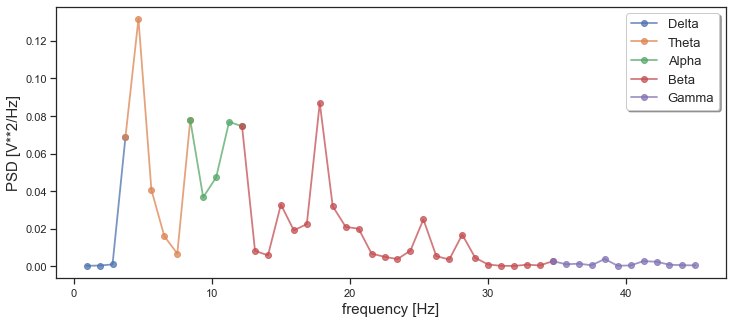

<Figure size 432x288 with 0 Axes>

In [63]:
eeg0.show_psd(title=None)

#### Welch Method

In [64]:
eeg1 = EEG(
    data=data,
    labels=labels,
    psd_opt={
        'name': 'welch',
        'fs': sampling_rate,
        'nfft': 128,
        'nperseg': 128,
        'window': 'hamming',
    }
)

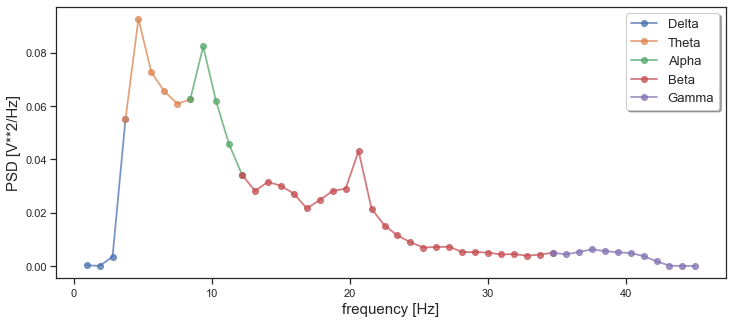

<Figure size 432x288 with 0 Axes>

In [65]:
eeg1.show_psd(k=12, title=None)

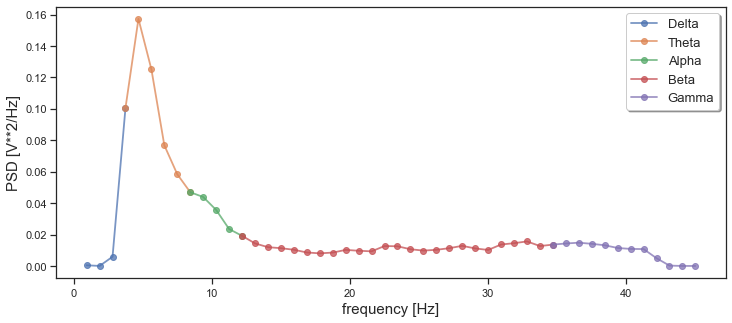

<Figure size 432x288 with 0 Axes>

In [66]:
eeg1.show_psd(k=47, title=None)

In [117]:
# 选择模型
eeg = eeg1

<AxesSubplot:>

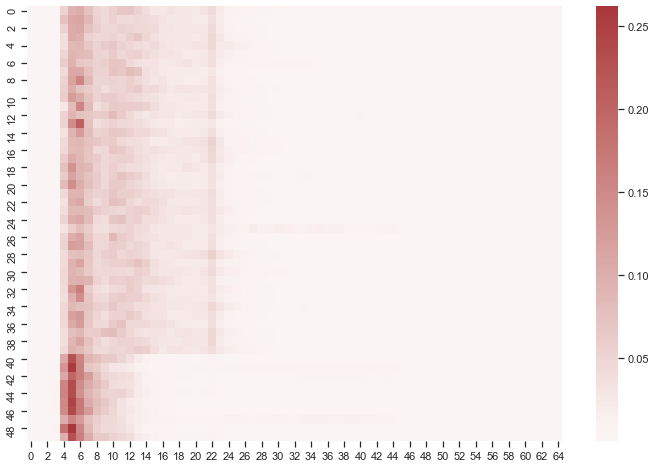

In [54]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(eeg.psd.psd[0:50, :], center=0, cmap='vlag')

### 提取特征

In [118]:
# 直接数据
features, labels = eeg.to_pandas()

In [119]:
features.to_excel("features_eeg1.xlsx")

In [120]:
# 对数处理
features_log, labels = eeg.to_pandas(log_scale=True)

In [121]:
features_log.to_excel("features_eeg1_log.xlsx")

In [69]:
features.describe()

,Delta,Theta,Alpha,Beta,Gamma
count,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000
mean,0.007670,0.622148,0.150650,0.234756,0.046541
std,0.003476,0.178096,0.066585,0.127572,0.042900
min,0.001210,0.177076,0.044040,0.024666,0.002300
25%,0.004757,0.483795,0.102168,0.124855,0.015647
50%,0.007549,0.622842,0.136964,0.232493,0.031787
75%,0.010141,0.769057,0.183484,0.323677,0.062563
max,0.018969,0.970658,0.426131,0.603924,0.242524


In [70]:
features_log.describe()

,Delta,Theta,Alpha,Beta,Gamma
count,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000
mean,-2.166952,-0.226163,-0.862403,-0.709422,-1.510594
std,0.223707,0.137150,0.187953,0.285795,0.409727
min,-2.917276,-0.751839,-1.356153,-1.607897,-2.638208
25%,-2.322710,-0.315338,-0.990683,-0.903595,-1.805565
50%,-2.122084,-0.205622,-0.863394,-0.633591,-1.497750
75%,-1.993939,-0.114042,-0.736402,-0.489888,-1.203683
max,-1.721958,-0.012934,-0.370457,-0.219018,-0.615245


In [71]:
labels.value_counts()

1    754
0    526
dtype: int64

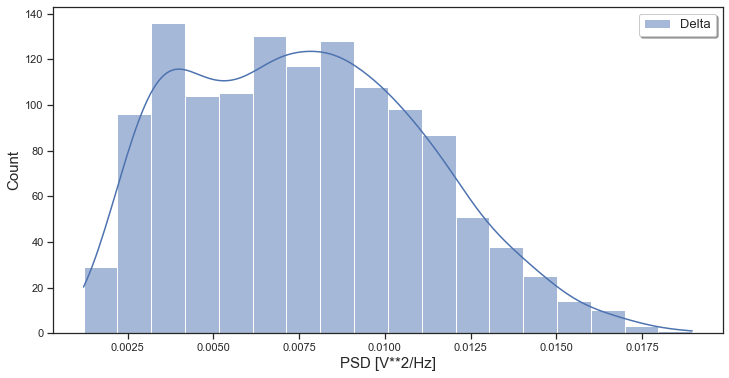

<Figure size 432x288 with 0 Axes>

In [22]:
eeg.show_histplot_one(0, log=False, title=None)

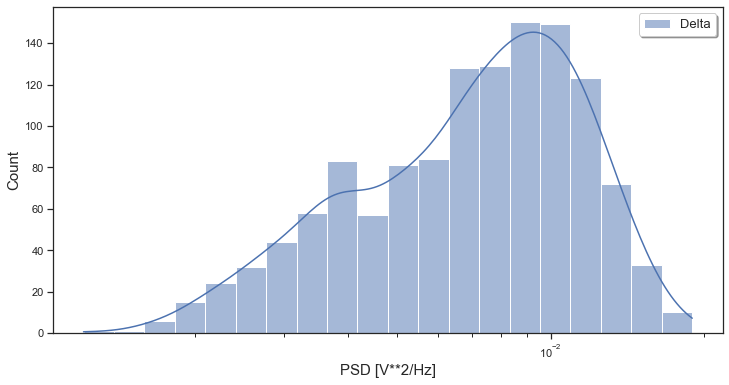

<Figure size 432x288 with 0 Axes>

In [23]:
eeg.show_histplot_one(0, log=True, title=None)

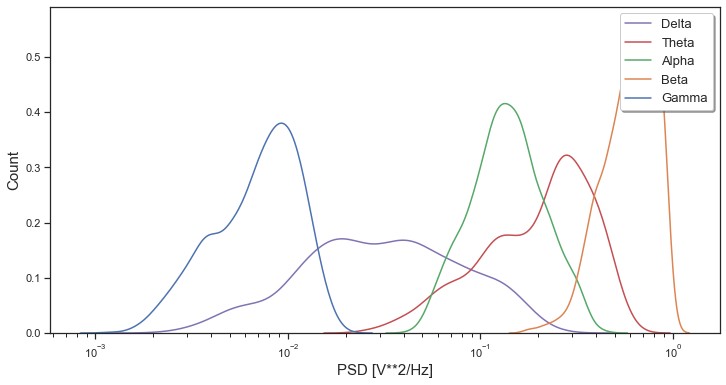

<Figure size 432x288 with 0 Axes>

In [56]:
eeg.show_kdeplot_all(log=True, title=None)

## Analysis Data

### 直接数据

In [122]:
df = features.copy()
df['label'] = labels.copy()

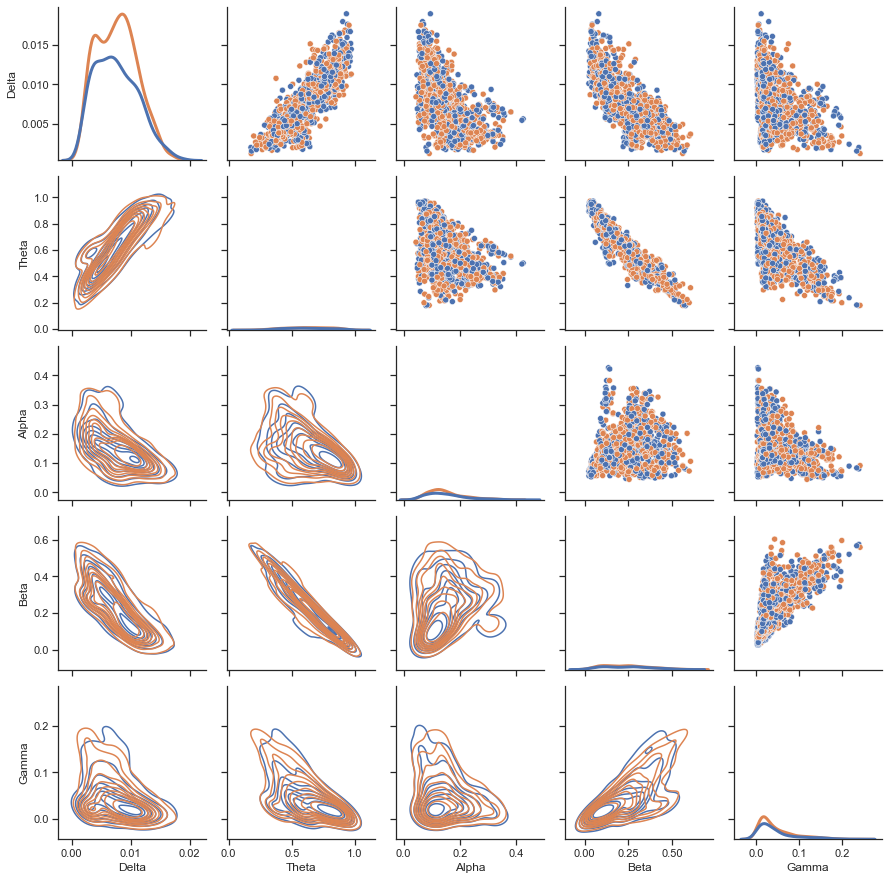

In [123]:
g = sns.PairGrid(df, hue="label")
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=3, legend=False)

<AxesSubplot:>

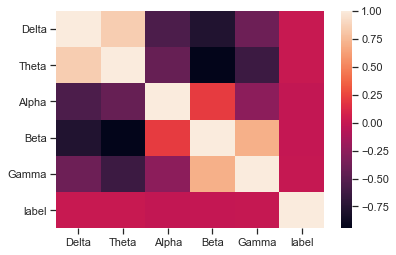

In [124]:
sns.heatmap(df.corr())

### Log化数据

In [125]:
df_log = features_log.copy()
df_log['label'] = labels.copy()

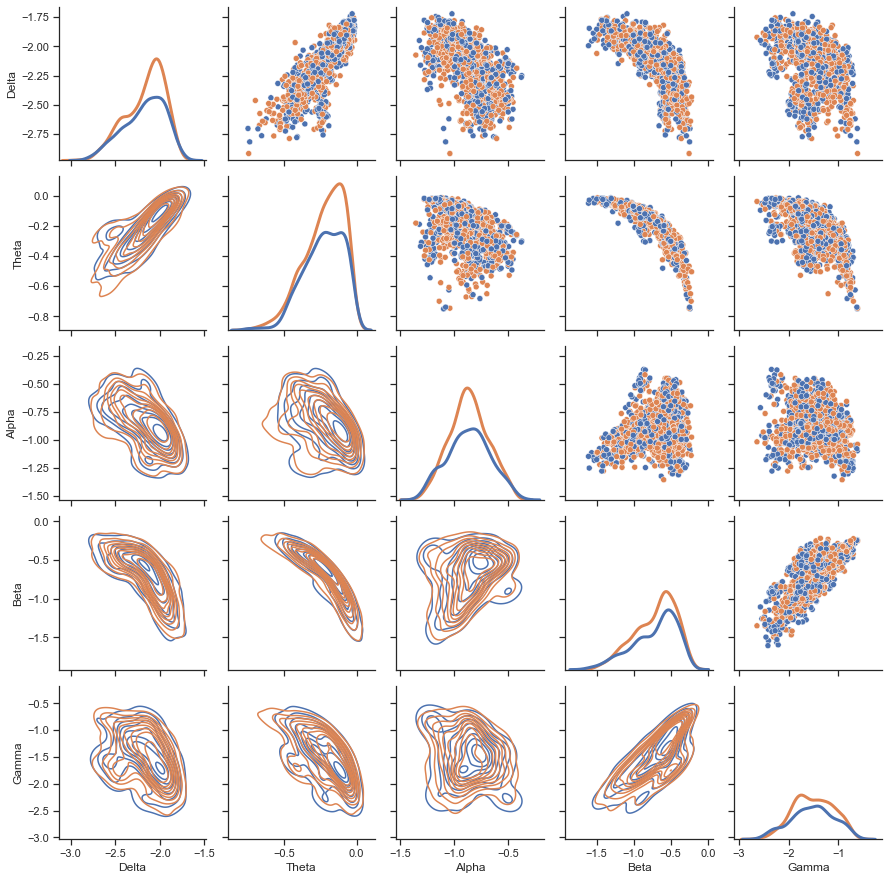

In [126]:
g = sns.PairGrid(df_log, hue="label")
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=3, legend=False)

<AxesSubplot:>

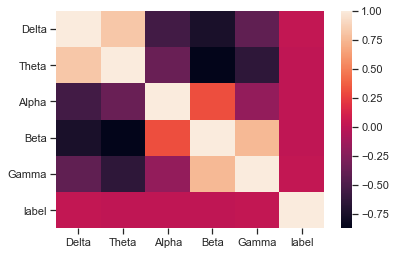

In [127]:
sns.heatmap(df_log.corr())

### 标准化数据

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
scaler = StandardScaler()

In [33]:
features_log_stand = scaler.fit_transform(df_log[df_log.columns.difference(['label'])])

In [34]:
df_log_stand = pd.DataFrame(
    features_log_stand,
    columns=features.columns
)
df_log_stand['label'] = labels

In [35]:
df_log_stand.describe()

,Delta,Theta,Alpha,Beta,Gamma,label
count,1.280000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1280.000000
mean,-1.887379e-16,-7.771561e-17,-9.992007e-17,-1.165734e-16,1.332268e-16,0.589063
std,1.000391e+00,1.000391e+00,1.000391e+00,1.000391e+00,1.000391e+00,0.492196
min,-2.628010e+00,-3.144998e+00,-3.355355e+00,-2.753187e+00,-3.834343e+00,0.000000
25%,-6.827797e-01,-6.796772e-01,-6.965326e-01,-7.202021e-01,-6.504544e-01,0.000000
50%,-5.278452e-03,2.654372e-01,2.006433e-01,3.136024e-02,1.498296e-01,1.000000
75%,6.706422e-01,7.684533e-01,7.736922e-01,7.493548e-01,8.178287e-01,1.000000
max,2.618406e+00,1.716601e+00,1.989959e+00,2.186088e+00,1.555320e+00,1.000000


<AxesSubplot:>

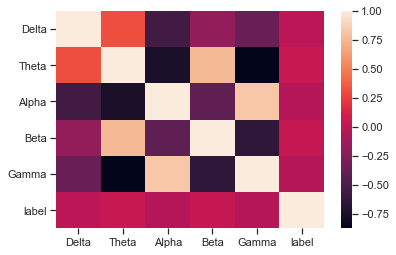

In [37]:
sns.heatmap(df_log_stand.corr())

### 主成分分析 PCA

In [38]:
from sklearn.decomposition import PCA

In [39]:
pca = PCA(n_components=3)
pca.fit(features_log)

In [41]:
pca.explained_variance_ratio_

array([0.71611788, 0.2195848 , 0.03187101])

In [43]:
df_log_pca = pd.DataFrame(
    pca.transform(features_log),
    columns=['PCA 1', 'PCA 2', 'PCA 3']
)
df_log_pca['label'] = labels

<AxesSubplot:>

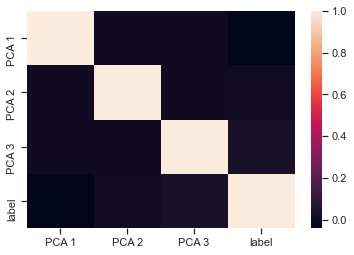

In [45]:
sns.heatmap(df_log_pca.corr())

## Classify

### Support Vector Machine

In [46]:
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [47]:
x_train, x_test, y_train, y_test = train_test_split(
    features_log, labels, test_size=0.2, shuffle=True
)

In [48]:
clf = svm.SVC(
    kernel='sigmoid',
    decision_function_shape='ovo'
)

In [49]:
clf.fit(
    x_train,
    y_train
)

y_pred = clf.predict(x_test)

In [50]:
f"{np.sum(y_pred == y_test) / y_test.size:.2%}"

'58.20%'

### FNN

In [86]:
import torch
import torch.nn as nn
import torch.nn.functional as Fun

class Net(torch.nn.Module):
    def __init__(self, n_feature, n_output):
        super(Net, self).__init__()
        self.hidden1 = torch.nn.Linear(n_feature, 8)
        self.hidden2 = torch.nn.Linear(8, 8)
        self.hidden3 = torch.nn.Linear(8, 6)
        self.out = torch.nn.Linear(6, n_output)
        
    def forward(self, x):
        x = Fun.relu(self.hidden1(x))
        x = Fun.relu(self.hidden2(x))
        x = Fun.relu(self.hidden3(x))
        x = self.out(x)
        return x

In [87]:
x_train, x_test, y_train, y_test = train_test_split(
    features, labels, test_size=0.2, random_state=0, shuffle=True
)

In [88]:
features_nn = torch.FloatTensor(x_train.to_numpy())
label_nn = torch.LongTensor(y_train.to_numpy())

In [89]:
net = Net(5, 2)
optimizer = torch.optim.SGD(net.parameters(), lr=0.05)
loss_func = torch.nn.CrossEntropyLoss()

In [90]:
for i in range(1000):
    out = net(features_nn)
    loss = loss_func(out, label_nn)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

In [91]:
out = net(torch.FloatTensor(x_test.to_numpy()))
prediction = out.argmax(dim=1)
pred_y = prediction.numpy()

In [92]:
pred_y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [93]:
y_test.to_numpy()

array([1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1])

In [94]:
f"{np.sum(pred_y == y_test) / y_test.size:.2%}"

'56.25%'